# <center> **Entrega_1** </center>

Imports necesarios:

In [1]:
import numpy as np
import cv2 as cv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd

<figure> <center> <img src='test.jpg' width="500" height="200"/>
<span style="color:lightblue"><center> Test 1, paso a escala de gris de la flor </center></span>

In [7]:
#Escala de grises necesita que el cv.imread se haga con 0 en el parámetro
imagen = cv.imread('test.jpg',0)
cv.imshow('Prueba de imagen',imagen)
"""
Acá se va a crear una nueva imagen que se llama
Grises.jpg en la carpeta de Entrega1
"""
cv.imwrite('Grises.jpg',imagen)
cv.waitKey(0)
cv.destroyAllWindows()

# Contornos:
Conjunto de puntos que encierran áreas de interés con imagenes a blanco y negro.
En cuanto a los parámetros podríamos escribirlos de la siguiente forma:

### $ image, contours, hierarchy = cv.findContours(image, mode, method, offset)$

**Donde**:
1. **image** = Imagen binaria
2. **mode** 

        = retr_list, *cuando*
        = retr_external
        = retr_ccomp
        = retr_tree
3. **method** 

          = approx_none cuando se quiere delimitar toca una figura
          = approx_simple cuando se quiere únicamente delimitar por vértices
          
          
En cuanto a la jerarquía de los contornos, si un contorno de un objeto $B$ está dentro de una contorno de más tamaño por fuera, $A$, quiere decir que para la misma imagen los contornos del objeto $A$ son padres y están por encima en jerarquía de la aquellos que sean parte del objeto $B$

## En cuanto al dibujo
Tomando en cuenta la función para encontrar los contornos con especificidades que requeramos:

### $ image, contours, hierarchy = cv.findContours(image, mode, method, offset)$
**Sea la función drawContours** 
### $ cv.drawContours(image,contours,contourIdx,color,thickness) $

**Donde:**
1. **image** = Imagen binaria
2. **contours** = contornos obtenidos 
3. **contourIdx** = el contorno que debe dibujarse, si es el 1,2,3... n; etc (si es negativo se dibujan todos los contornos).
4. **color** = color en el que se va a dibujar
5. **thicknes** = grosor de la línea

In [3]:
imagen = cv.imread('test_contours.jpg',0)
cv.imshow('Prueba de imagen',imagen)
"""
Acá se va a crear una nueva imagen que se llama
Grises.jpg en la carpeta de Entrega1
"""
cv.imwrite('Grises.jpg',imagen)
cv.waitKey(0)
cv.destroyAllWindows()

<figure> <center> <img src='test_contours.jpg' width="500" height="200"/>
<span style="color:green"><center> Test Contours </center></span>

In [4]:
help(cv.findContours)
print('-----------------')
help(cv.drawContours)

Help on built-in function findContours:

findContours(...)
    findContours(image, mode, method[, contours[, hierarchy[, offset]]]) -> contours, hierarchy
    .   @brief Finds contours in a binary image.
    .   
    .   The function retrieves contours from the binary image using the algorithm @cite Suzuki85 . The contours
    .   are a useful tool for shape analysis and object detection and recognition. See squares.cpp in the
    .   OpenCV sample directory.
    .   @note Since opencv 3.2 source image is not modified by this function.
    .   
    .   @param image Source, an 8-bit single-channel image. Non-zero pixels are treated as 1's. Zero
    .   pixels remain 0's, so the image is treated as binary . You can use #compare, #inRange, #threshold ,
    .   #adaptiveThreshold, #Canny, and others to create a binary image out of a grayscale or color one.
    .   If mode equals to #RETR_CCOMP or #RETR_FLOODFILL, the input can also be a 32-bit integer image of labels (CV_32SC1).
    .   @p

Notar que la forma de expresión de los contornos está definida por:


        [0] |Pos_1|Pos_2|Pos_3|Pos_4|
        [1] |Pos_1|Pos_2|Pos_3|Pos_4|
        [2] |Pos_1|Pos_2|Pos_3|Pos_4|
        .
        .
        .
        [n] |Pos_1|Pos_2|Pos_3|Pos_4|

## **En donde:** 


$Pos_1$ es el contorno siguiente,



$Pos_2$ es el contorno anterior,


$Pos_3$ es el contorno hijo,



$Pos_4$ es el contorno padre


Cuando alguno de los valorpes de posición toma el valor $-1$ indica que no existe para esa posición un contorno.
En cualquier otro caso ***Por ejemplo 0,1,2 ... n,*** indica la jerarquía del contorno en esa posición.

In [8]:
image = cv.imread('test_contours.jpg')
cv.waitKey(0)

gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)

#Encontrar los límites

edged = cv.Canny(gray,30,200)
cv.waitKey(0)

contours,hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL,cv.CHAIN_APPROX_NONE)
cv.imshow('Bordes para evaluar',edged)
cv.waitKey(0)

print('Número de contornos encontrados, ',edged)
cv.drawContours(image,contours,-1,(0,255,0),3)
cv.imshow('Contornos encontrados ',image)
cv.waitKey(0)
cv.destroyAllWindows()

Número de contornos encontrados,  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


<figure> <center> <img src='xsinx.png' width="500" height="200"/>
<span style="color:blue"><center> Curva del estilo x sin(x) </center></span>

## Prueba con una curva

In [9]:
image = cv.imread('xsinx.png')
#cv.waitKey(0)

gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)

#Encontrar los límites

edged = cv.Canny(gray,30,200)
cv.waitKey(0)

contours,hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL,cv.CHAIN_APPROX_NONE)
cv.imshow('Bordes para evaluar',edged)
cv.waitKey(0)

print('Número de contornos encontrados, ',edged)
cv.drawContours(image,contours,-1,(0,255,0),3)
cv.imshow('Contornos encontrados ',image)
cv.waitKey(0)
cv.destroyAllWindows()

Número de contornos encontrados,  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Prueba con curva discontinua

Para efectos prácticos la curva se toma directamente de la base de datos encontrada en la base de datos oficial del LISN en el
[link](http://lisn.igp.gob.pe/realtime/abpw_tec.png) que corresponde al plot en la estación __Bogotá, tomado el 12 de Noviembre__

<figure> <center> <img src='bogota.png' width="500" height="200"/>
<span style="color:blue"><center> Estación BOGOTA </center></span>

In [7]:
help(cv.findContours)

Help on built-in function findContours:

findContours(...)
    findContours(image, mode, method[, contours[, hierarchy[, offset]]]) -> contours, hierarchy
    .   @brief Finds contours in a binary image.
    .   
    .   The function retrieves contours from the binary image using the algorithm @cite Suzuki85 . The contours
    .   are a useful tool for shape analysis and object detection and recognition. See squares.cpp in the
    .   OpenCV sample directory.
    .   @note Since opencv 3.2 source image is not modified by this function.
    .   
    .   @param image Source, an 8-bit single-channel image. Non-zero pixels are treated as 1's. Zero
    .   pixels remain 0's, so the image is treated as binary . You can use #compare, #inRange, #threshold ,
    .   #adaptiveThreshold, #Canny, and others to create a binary image out of a grayscale or color one.
    .   If mode equals to #RETR_CCOMP or #RETR_FLOODFILL, the input can also be a 32-bit integer image of labels (CV_32SC1).
    .   @p

# ENTREGA: Cortar las imágenes de prueba

Tareas:
1. Quitar los bordes de la png, cargar del desktop, una sóla vez con las coordenadas y se itera con los archivos guardando el corte en png 1,2,3,4,...n ✅ 
2. Cómo asociar pixeles a las escalas de la fotografía:
3. Cropping de las escalas y tratar de ver los números de los pixeles, y las escalas.


In [21]:
prueba1 = imread('prueba1.png')
print(type(prueba1))
prueba1.shape,prueba1.size,prueba1.ndim

<class 'numpy.ndarray'>


((600, 800, 4), 1920000, 3)

In [2]:
#PRUEBA
def limitar_imagen(imagen):
    print(imagen)
    image = cv.imread(imagen)
    image.shape
    gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
    edged = cv.Canny(gray,30,200)
    contours,hierarchy = cv.findContours(edged, cv.RETR_TREE,cv.CHAIN_APPROX_NONE)
    image = cv.drawContours(image,contours,-1,(0,255,0),3)
    cropped_image = image[70:550,96:660]
    gris = cv.cvtColor(cropped_image, cv.COLOR_BGR2GRAY)
    (thresh, binaria) = cv.threshold(gris, 150, 255, cv.THRESH_BINARY)
    fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(5,5))
    ax.imshow(binaria,cmap='gray')
    ax.set_title('GRÁFICA BINARIA')
    return binaria

In [3]:
def ejex(lista,indice):
    longitud = len(lista)
    unitario = np.ones(longitud)
    numero = int(indice)
    eje = []
    for j in unitario:
        eje.append(j*numero)
        np.array(eje)
    return eje

In [4]:
def transformacion(imagen):
    im1 = limitar_imagen(imagen)
    txt = imagen
    name = txt.replace('.png','')
    #Primero usamos la def limitar_imagen:
    array = []
    for i in im1:
        array.append(i)
    df = pd.DataFrame(array)
    display(df)
    df.to_csv(name+'.csv')
    #Del Colab:
    j = []
    for i in range(0,len(df.axes[1])):
        j.append(str(i))
    j.pop()
    #print(j)
    c1 = int(len(j)/4)
    c2 = (c1*2)
    c3 = (c1*3)
    #print(mitad)
    rango1 = j[0:c1]
    rango2 = j[c1:c2]
    rango3 = j[c2:c3]
    rango4 = j[c3:]
    #DEFS INICIALES
    filas1 = []
    filas2 = []
    filas3 = []
    filas4 = []
    columnas1 = []
    #LOOP PRINCIPAL
    df = pd.read_csv(name+'.csv')
    df = pd.DataFrame(df)
    for i in rango1:
        filas1.append(df.index[df[i] == 0].tolist())
    for i in rango2:
        filas2.append(df.index[df[i] == 0].tolist())
    for i in rango3:
        filas3.append(df.index[df[i] == 0].tolist())
    for i in rango4:
        filas4.append(df.index[df[i] == 0].tolist())
        #Uso del Def1
    fig,(ax,ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=4,figsize=(5,5))
    #Invertido
    for i in range(0,len(filas1)):
        ax.plot(ejex(filas1[i],i),filas1[i],linestyle='',marker='.',color='black',linewidth=0.1)
        ax.set_ylim(0,500)
    for i in range(0,len(filas2)):
        ax1.plot(ejex(filas2[i],i),filas2[i],linestyle='',marker='.',color='black',linewidth=0.1)
        ax1.set_ylim(0,500)
    for i in range(0,len(filas3)):
        ax2.plot(ejex(filas3[i],i),filas3[i],linestyle='',marker='.',color='black',linewidth=0.1)
        ax2.set_ylim(0,500)
    for i in range(0,len(filas4)):
        ax3.plot(ejex(filas4[i],i),filas4[i],linestyle='',marker='.',color='black',linewidth=0.1)
        ax3.set_ylim(0,500)
    #ax.invert_xaxis()
    ax.invert_yaxis()
    #ax1.invert_xaxis()
    ax1.invert_yaxis()
    #ax2.invert_xaxis()
    ax2.invert_yaxis()
    #ax3.invert_xaxis()
    ax3.invert_yaxis()
    plt.title('Figura: '+name)
    plt.show()
    return

prueba1.png


,0,1,2,3,4,5,6,7,8,9,...,554,555,556,557,558,559,560,561,562,563
0,255,0,0,0,0,0,0,0,255,255,...,255,255,255,255,255,255,255,255,255,255
1,255,0,0,0,0,0,0,0,255,255,...,255,255,255,255,255,255,255,255,255,255
2,255,0,0,0,0,0,0,0,255,255,...,255,255,255,255,255,255,255,255,255,255
3,255,0,0,0,0,0,0,0,255,255,...,255,255,255,255,255,255,255,255,255,255
4,255,0,0,0,0,0,0,0,255,255,...,255,255,255,255,255,255,255,255,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,0,0,0,0,0,0,0,255,255,...,0,0,0,0,0,255,255,255,255,255
476,0,0,0,0,0,0,0,0,255,255,...,0,0,0,0,0,255,255,255,255,255
477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


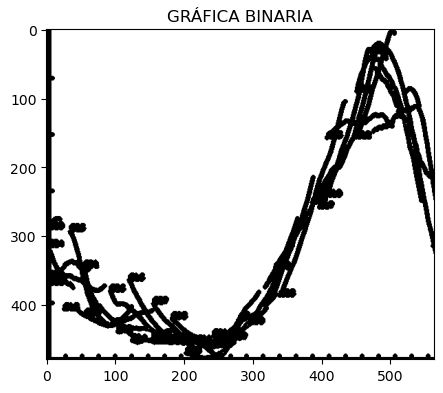

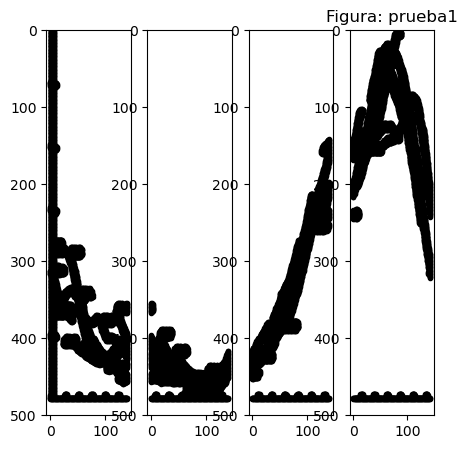

prueba2.png


,0,1,2,3,4,5,6,7,8,9,...,554,555,556,557,558,559,560,561,562,563
0,255,0,0,0,0,0,0,0,255,255,...,255,255,255,255,255,255,255,255,255,255
1,255,0,0,0,0,0,0,0,255,255,...,255,255,255,255,255,255,255,255,255,255
2,255,0,0,0,0,0,0,0,255,255,...,255,255,255,255,255,255,255,255,255,255
3,255,0,0,0,0,0,0,0,255,255,...,255,255,255,255,255,255,255,255,255,255
4,255,0,0,0,0,0,0,0,255,255,...,255,255,255,255,255,255,255,255,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,0,0,0,0,0,0,0,255,255,...,0,0,0,0,0,255,255,255,255,255
476,0,0,0,0,0,0,0,0,255,255,...,0,0,0,0,0,255,255,255,255,255
477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


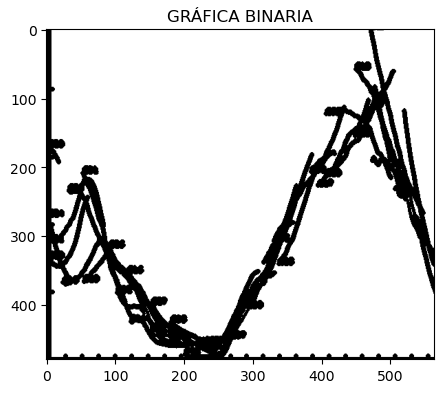

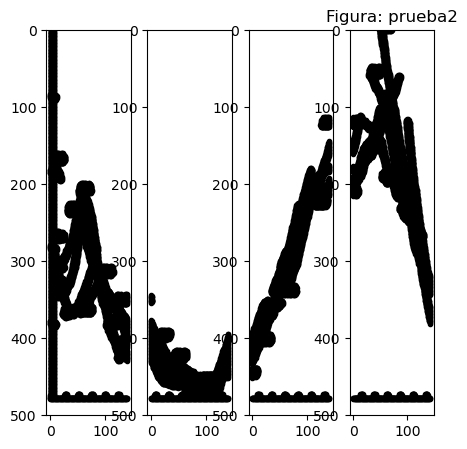

prueba3.png


,0,1,2,3,4,5,6,7,8,9,...,554,555,556,557,558,559,560,561,562,563
0,255,0,0,0,0,0,0,0,255,255,...,255,255,255,255,255,255,255,255,255,255
1,255,0,0,0,0,0,0,0,255,255,...,255,255,255,255,255,255,255,255,255,255
2,255,0,0,0,0,0,0,0,255,255,...,255,255,255,255,255,255,255,255,255,255
3,255,0,0,0,0,0,0,0,255,255,...,255,255,255,255,255,255,255,255,255,255
4,255,0,0,0,0,0,0,0,255,255,...,255,255,255,255,255,255,255,255,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,0,0,0,0,0,0,0,255,255,...,0,0,0,0,0,255,255,255,255,255
476,0,0,0,0,0,0,0,0,255,255,...,0,0,0,0,0,255,255,255,255,255
477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


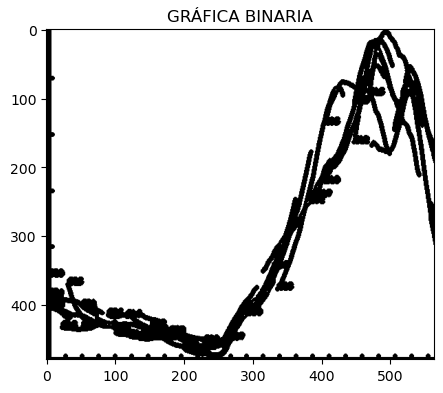

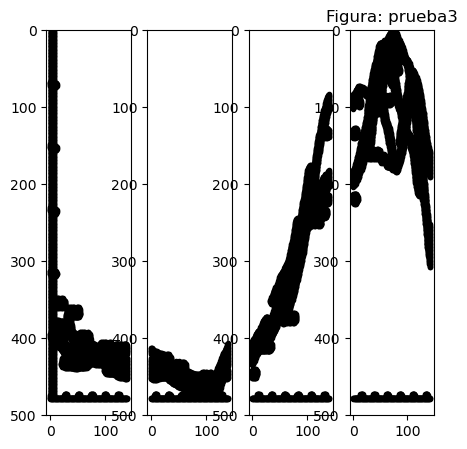

In [5]:
transformacion('prueba1.png')
transformacion('prueba2.png')
transformacion('prueba3.png')

prueba1.png
[[255   0   0 ... 255 255 255]
 [255   0   0 ... 255 255 255]
 [255   0   0 ... 255 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


,0,1,2,3,4,...,559,560,561,562,563
0,255,0,0,0,0,...,255,255,255,255,255
1,255,0,0,0,0,...,255,255,255,255,255
2,255,0,0,0,0,...,255,255,255,255,255
3,255,0,0,0,0,...,255,255,255,255,255
4,255,0,0,0,0,...,255,255,255,255,255
...,...,...,...,...,...,...,...,...,...,...,...
475,0,0,0,0,0,...,255,255,255,255,255
476,0,0,0,0,0,...,255,255,255,255,255
477,0,0,0,0,0,...,0,0,0,0,0
478,0,0,0,0,0,...,0,0,0,0,0


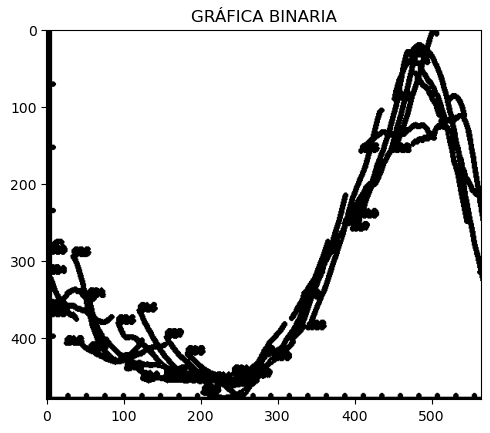

In [53]:
im1 = limitar_imagen('prueba1.png')
print(im1)
array = []
pd.set_option('display.max_rows',10)
pd.set_option('display.max_columns',10)
for i in im1:
    array.append(i)
data = pd.DataFrame(array)
#data.to_csv('prueba.csv')
display(data)

In [12]:
df = pd.read_csv('prueba.csv')
display(df.head())

,Unnamed: 0,0,1,2,3,...,459,460,461,462,463
0,0,255,0,0,0,...,0,0,0,0,0
1,1,255,0,0,0,...,0,0,0,0,0
2,2,255,0,0,0,...,0,0,0,0,0
3,3,255,0,0,0,...,0,0,0,0,255
4,4,255,0,0,0,...,0,0,0,0,255


In [14]:
posicion = []
j = range(0,463)
for columna in df[range(0,463)]:
    for fila in columna:
        if fila == 255:
            posicion.append(zip(fila,columna))
posicion.shape    

KeyError: "None of [Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,\n            ...\n            453, 454, 455, 456, 457, 458, 459, 460, 461, 462],\n           dtype='int64', length=463)] are in the [columns]"

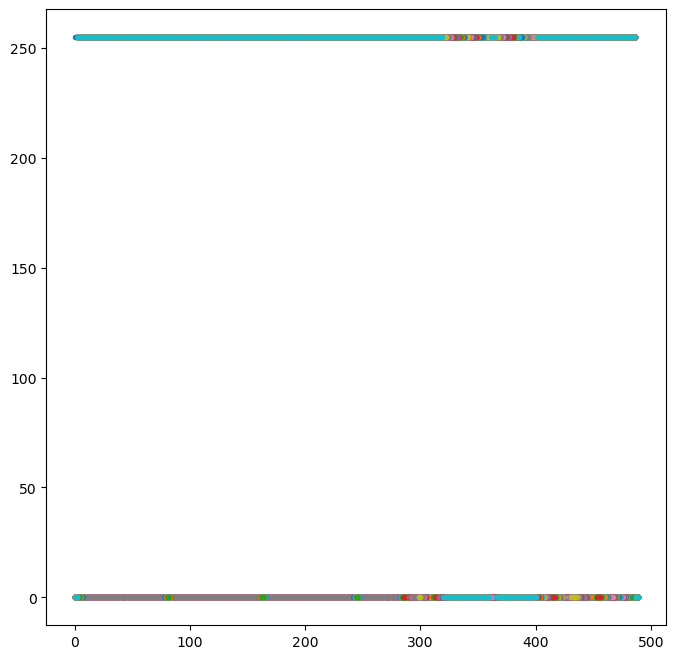

In [5]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(8,8))
for i in range(0,350):
    ax.plot(range(0,490),data[i],marker='.',linestyle='')

Ocr para quitar el txt

1. Dónde están los pixeles de las escalas

prueba1.png
prueba2.png
prueba3.png


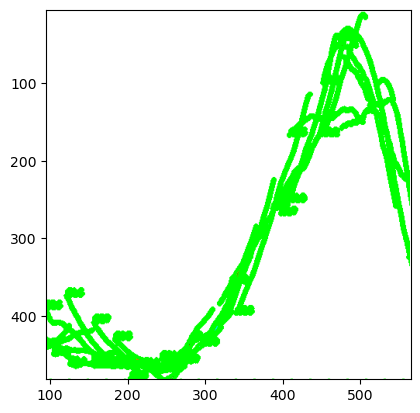

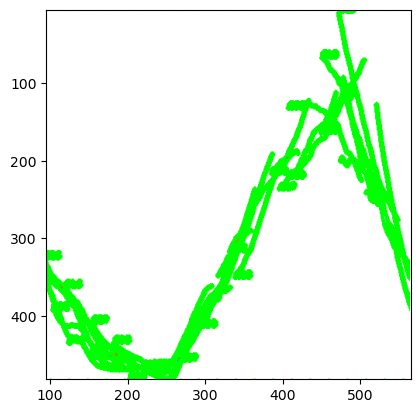

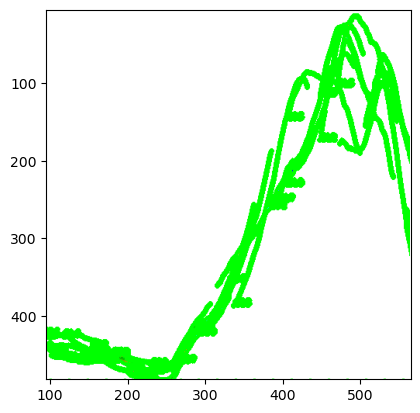

In [253]:
limitar_imagen('prueba1.png')
limitar_imagen('prueba2.png')
limitar_imagen('prueba3.png')

In [14]:
gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
edged = cv.Canny(gray,30,200)
contours,hierarchy = cv.findContours(edged, cv.RETR_TREE,cv.CHAIN_APPROX_NONE)
cv.drawContours(image,contours,-1,(0,255,0),3)
print(edged)
print(np.shape(edged))
#Verde únicamente con forma 600x800

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ... 255   0   0]
 [  0   0   0 ...   0 255 255]
 [  0   0   0 ...   0   0   0]]
(600, 800)
